In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.stats import linregress
import matplotlib
font = {'size'   : 12}

matplotlib.rc('font', **font)
import time
%matplotlib ipympl

In [2]:

from scipy import signal

sos = signal.butter(3, [1,100], 'bp', fs=10000, output='sos')

In [3]:
time = np.arange(0,3000,.1)

In [7]:
EEGs = np.load('25e32d7d-e6f0-498a-abd4-a1540c025387/EEGs.npy',allow_pickle=True).item()
total = np.load('25e32d7d-e6f0-498a-abd4-a1540c025387/total.npy')

EEGsOriginal = np.load('../original/6163253e-98a7-43cf-be9e-bd260ef34663/EEGs.npy',allow_pickle=True).item()
totalOriginal = np.load('../original/6163253e-98a7-43cf-be9e-bd260ef34663/total.npy')

EEGsRewired = np.load('../rewired/b16db1b3-49f7-4a8d-8012-6334eb7182b7/EEGs.npy',allow_pickle=True).item()
totalRewired = np.load('../rewired/b16db1b3-49f7-4a8d-8012-6334eb7182b7/total.npy')

In [5]:
total[:,1]

array([ 0.00000000e+00,  1.21306910e-14,  7.40120421e-14, ...,
       -2.56774610e-14, -5.09302603e-14, -5.97724340e-14])

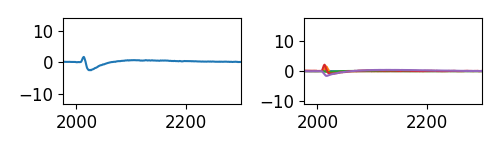

In [6]:
plt.figure(figsize=(5,1.5))



plt.subplot(1,2,1)
plt.plot(time,total[:,0]*1e6)
# plt.ylabel('Amplitude (au)')
plt.xlim([1975,2300])
# # plt.gca().set_xticklabels([])
# plt.ylim([-2,2])
# plt.title('Total signal')
# plt.xlabel('Time (ms)')

plt.subplot(1,2,2)
for layer in np.arange(2,7):
    signal = 0
    for t in EEGs.keys():
        if str(layer) in t:
            try:
                signal += EEGs[t][:,0]
            except:
                pass

    plt.plot(time,signal*1e6)
    
# plt.legend(np.arange(2,7))
plt.xlim([1975,2300])
# plt.ylim([-2,2])
# plt.ylabel('Amplitude (au)')
# plt.xlabel('Time (ms)')
# plt.title('Contribution by layer')

plt.tight_layout()

Text(0.5, 1.0, 'Contribution by layer')

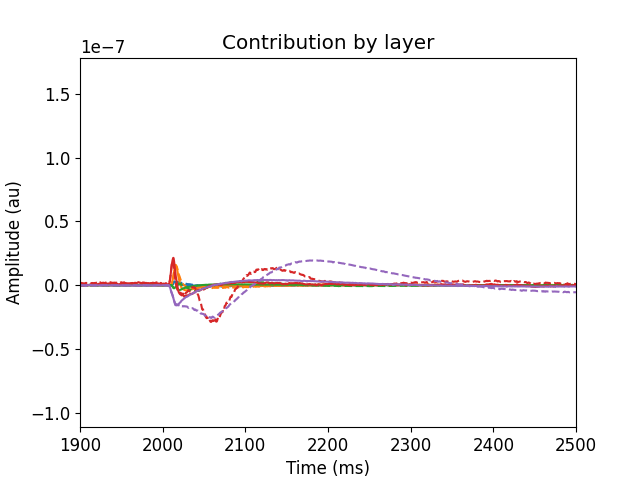

In [7]:
plt.figure()
for layer in np.arange(2,7):
    signal = 0
    signalOriginal = 0
    for t in EEGs.keys():
        if str(layer) in t:
            try:
                signal += EEGs[t][:,0]
                signalOriginal += EEGsOriginal[t][:,0]
            except:
                pass

    plt.plot(time,signal/100,c='C'+str(layer-2))
    plt.plot(time,signalOriginal/100,'--',c='C'+str(layer-2))
    
# plt.legend(np.arange(2,7))
plt.xlim([1900,2500])
# plt.ylim([-2,2])
plt.ylabel('Amplitude (au)')
plt.xlabel('Time (ms)')
plt.title('Contribution by layer')

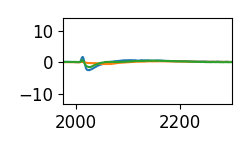

In [8]:
plt.figure(figsize=(2.5,1.5))

plt.plot(time,total[:,0]*1e6)
plt.plot(time,totalOriginal[:,0]*1e6)
plt.plot(time,totalRewired[:,0]*1e6)

plt.xlim([1975,2300])
# plt.legend(['Original','Rewired'])
# plt.xlabel('Time (ms)')
# plt.ylabel('Signal')
plt.tight_layout()
plt.show()